# Data Augmentation
## What is Data Augmentation?
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.  

### Augmented vs. Synthetic data

`Augmented data` is driven from original data with some minor changes. In the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set. 

`Synthetic data` is generated artificially without using the original dataset. It often uses DNNs (Deep Neural Networks) and GANs (Generative Adversarial Networks) to generate synthetic data. 

<b>Note:</b> the augmentation techniques are not limited to images. You can augment audio, video, text, and other types of data too. 

### When Should You Use Data Augmentation?  

    To prevent models from overfitting.
    The initial training set is too small.
    To improve the model accuracy.
    To Reduce the operational cost of labeling and cleaning the raw dataset. 


### Data Augmentation Techniques
<b>Audio Data Augmentation</b> 

        Noise injection: add gaussian or random noise to the audio dataset to improve the model performance. 
        Shifting: shift audio left (fast forward) or right with random seconds.
        Changing the speed: stretches times series by a fixed rate.
        Changing the pitch: randomly change the pitch of the audio.

<b>Text Data Augmentation</b> 

    Word or sentence shuffling: randomly changing the position of a word or sentence. 
    Word replacement: replace words with synonyms.
    Syntax-tree manipulation: paraphrase the sentence using the same word.
    Random word insertion: inserts words at random. 
    Random word deletion: deletes words at random.


## Data Augmentation Applications
### Healthcare

Acquiring and labeling medical imaging datasets is time-consuming and expensive. You also need a subject matter expert to validate the dataset before performing data analysis. Using geometric and other transformations can help you train robust and accurate machine-learning models. 

For example, in the case of Pneumonia Classification, you can use random cropping, zooming, stretching, and color space transformation to improve the model performance. However, you need to be careful about certain augmentations as they can result in opposite results. For example, random rotation and reflection along the x-axis are not recommended for the X-ray imaging dataset. 

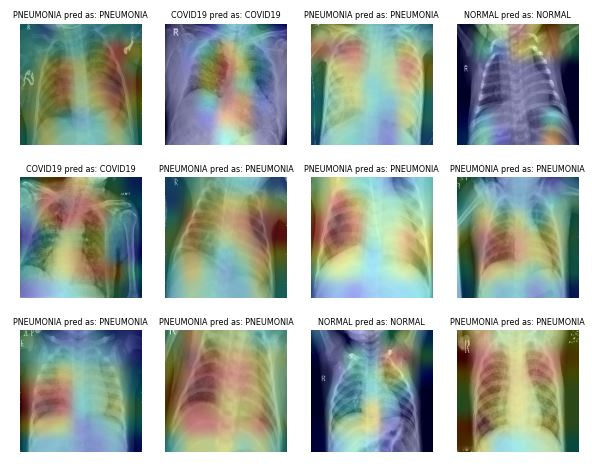

### Self-Driving Cars

There is limited data available on self-driving cars, and companies are using simulated environments to generate synthetic data using reinforcement learning. It can help you train and test machine learning applications where data security is an issue. 

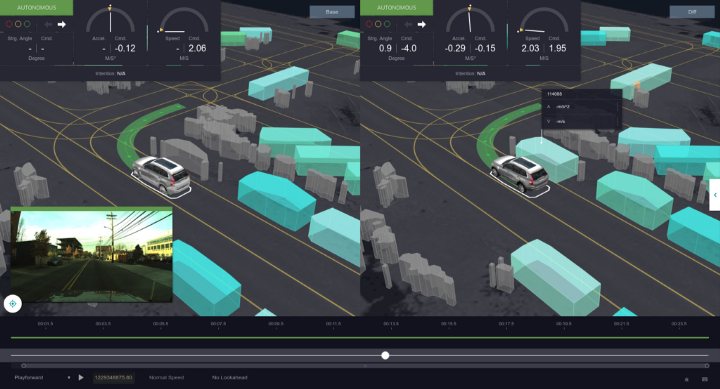

### Natural Language Processing

Text data augmentation is generally used in situations with limited quality data, and improving the performance metric takes priority. You can apply synonym augmentation, word embedding, character swap, and random insertion and deletion. These techniques are also valuable for low-resource languages.

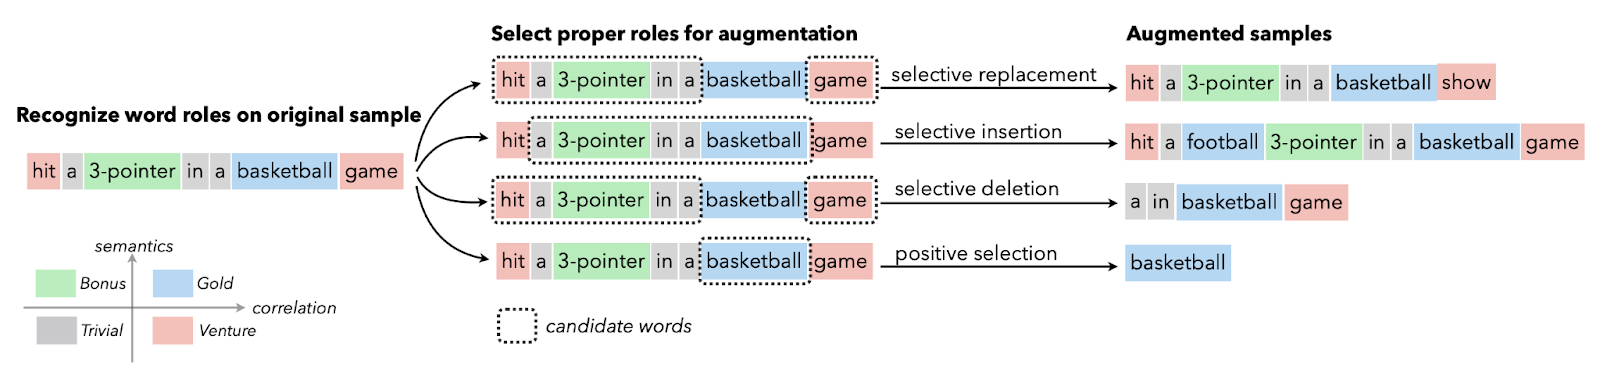

### Let's dive in the code

#### Data Augmentation To Address Overfitting In Flower Classification CNN


#### In this notebook i will build a CNN to classify flower images. I will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc



#### In below image, 4 new training samples are generated from original sample using different transformations

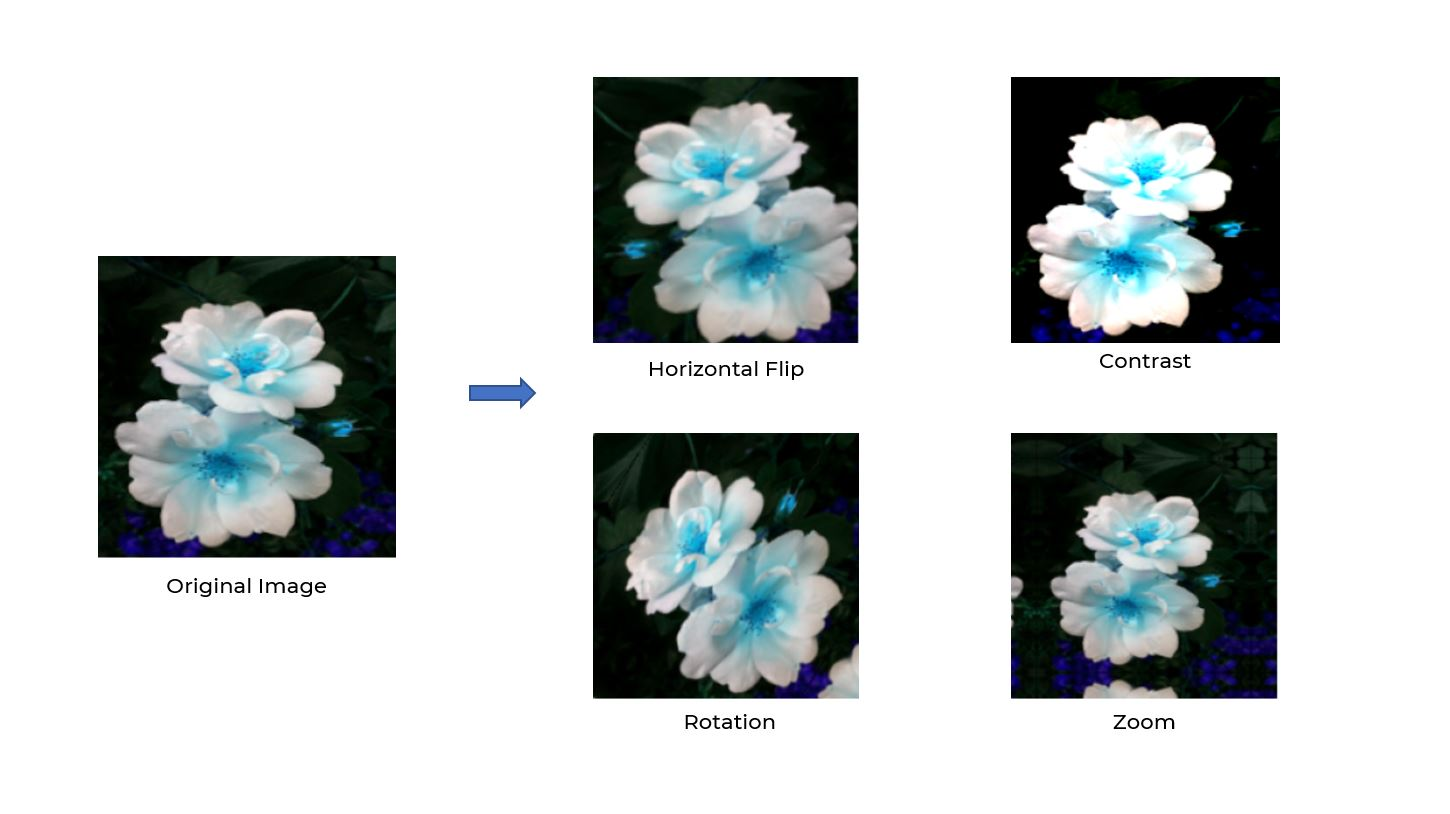

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-06-11 21:29:00.149510: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 21:29:00.445193: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 21:29:01.815939: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 21:29:05.118965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### I will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder



In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

### Successfully downloaded the flower dataset which consists of daisy, dandelion, roses, sunflowers, tulips flowers

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib # allow us to get specific files from that directory

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/tulips/13529687904_3d60abb479_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8623173256_3f0eb4c506.jpg'),
 PosixPath('datasets/flower_photos/tulips/4353419275_79d3904074_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/17202535346_ab828e779b.jpg'),
 PosixPath('datasets/flower_photos/tulips/16702117379_c25bff70e9.jpg'),
 PosixPath('datasets/flower_photos/tulips/4550117239_5907aaba4c.jpg'),
 PosixPath('datasets/flower_photos/tulips/3485767306_6db7bdf536.jpg'),
 PosixPath('datasets/flower_photos/tulips/2440874162_27a7030402_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7166640338_46b15d9ec8_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13539384593_23449f7332_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/9446982168_06c4d71da3_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13471563274_471fc1db33_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/5529939805_1679b014e1_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16702188449_3d

### List of all the JPG images that our folder contains

In [7]:
# let's check the length
len(list(data_dir.glob('*/*.jpg')))

3670

In [8]:
# let's see how many dandelions are there

dand = list(data_dir.glob('dandelion/*'))
len(dand)

898

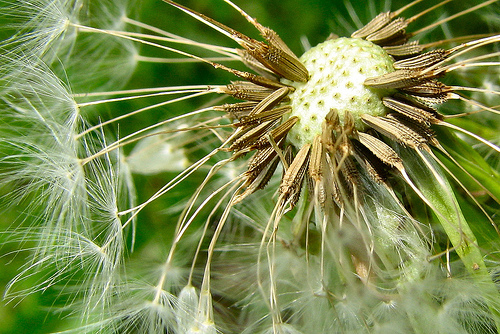

In [9]:
import PIL.Image #shows the image

PIL.Image.open(str(dand[3]))

In [10]:
# Let's go inside tulips

tulips = list(data_dir.glob('tulips/*'))
len(tulips)

799

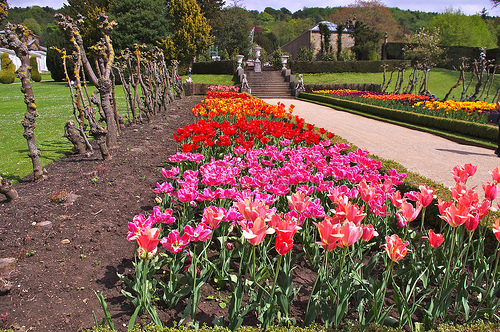

In [11]:
PIL.Image.open(str(tulips[-1]))

In [12]:
# Let's create a dictionary to store all the flowers's image

flower_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),

}

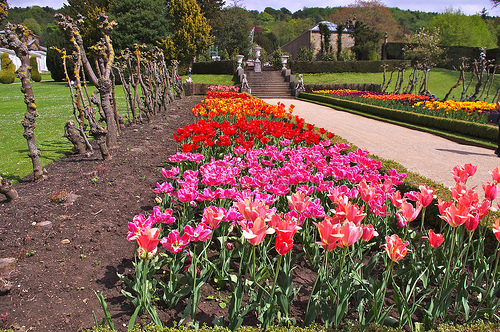

In [13]:
PIL.Image.open(flower_dict['tulips'][-1])

In [14]:
# create a dict and assign rose as 0, dandelion as 1 and so on. 

label_dict = {
    'roses':0,
    'dandelion':1,
    'daisy':2,
    'sunflower':3,
    'tulips':4,

}

In [15]:
flower_dict['roses'][1]

# File path of second rose image

PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg')

In [16]:
img = cv2.imread(flower_dict['roses'][1])
img

array([[[197, 221, 227],
        [194, 218, 224],
        [201, 223, 229],
        ...,
        [  6,  58,  65],
        [ 35,  97, 121],
        [ 86, 139, 159]],

       [[197, 221, 227],
        [194, 218, 224],
        [200, 222, 228],
        ...,
        [  0,  11,  22],
        [  0,  54,  67],
        [  0, 112, 116]],

       [[198, 222, 228],
        [194, 218, 224],
        [199, 221, 227],
        ...,
        [  0,  15,  23],
        [ 13,  65,  65],
        [ 16, 105, 109]],

       ...,

       [[ 37,  49,  51],
        [ 34,  46,  48],
        [ 42,  54,  56],
        ...,
        [ 43,  55,  59],
        [ 45,  58,  60],
        [ 48,  61,  63]],

       [[ 43,  52,  55],
        [ 43,  52,  55],
        [ 55,  64,  67],
        ...,
        [ 43,  55,  59],
        [ 46,  59,  61],
        [ 49,  62,  64]],

       [[ 41,  50,  53],
        [ 52,  61,  64],
        [ 39,  48,  51],
        ...,
        [ 43,  55,  59],
        [ 44,  57,  59],
        [ 43,  56,  58]]

### 3-dim array

In [17]:
img.shape

(256, 320, 3)

### We have different shape and size of image. It is a good technique to convert all the images into same shape so lets do that

In [18]:
x, y = [], []

for flower_name, images in flower_dict.items():
    # print(flower_name) # folder name
    # print(len(images)) # length

    for image in images:
        img = cv2.imread(image)
        resize_img = cv2.resize(img, (180,180))
        x.append(resize_img)
        y.append(label_dict[flower_name])


In [19]:
y[1]

0

In [20]:
x[1]

array([[[196, 220, 226],
        [200, 222, 228],
        [197, 219, 225],
        ...,
        [ 19, 102, 119],
        [  4,  50,  57],
        [ 52, 116, 134]],

       [[196, 220, 226],
        [199, 221, 227],
        [196, 218, 224],
        ...,
        [ 23, 102, 112],
        [  4,  21,  30],
        [  9,  89,  94]],

       [[197, 221, 227],
        [198, 220, 226],
        [198, 220, 226],
        ...,
        [ 25, 116, 118],
        [  8,  23,  34],
        [ 15,  91,  90]],

       ...,

       [[ 43,  54,  58],
        [ 44,  55,  59],
        [ 47,  58,  61],
        ...,
        [ 42,  54,  58],
        [ 46,  58,  62],
        [ 47,  60,  62]],

       [[ 38,  49,  52],
        [ 46,  57,  59],
        [ 55,  66,  69],
        ...,
        [ 48,  60,  64],
        [ 43,  55,  59],
        [ 47,  60,  62]],

       [[ 45,  54,  57],
        [ 43,  52,  55],
        [ 42,  50,  54],
        ...,
        [ 39,  51,  55],
        [ 43,  55,  60],
        [ 44,  57,  59]]

In [21]:
x = np.array(x)
y = np.array(y)


### Split the dataset for training and testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
len(X_train)

2936

In [24]:
len(X_test)

734

### Preprocessing: scale images


In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5) 

In [ ]:
model.evaluate(X_test_scaled,y_test)


Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting



In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)


In [ ]:
y_test[0]


### Improve Test Accuracy Using Data Augmentation


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Original Image



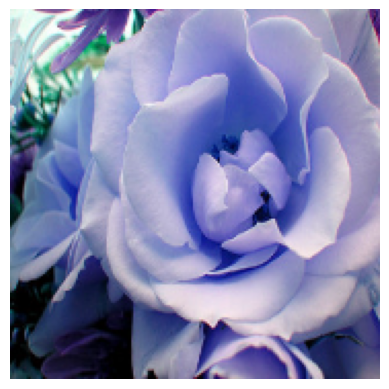

In [27]:
plt.axis('off')
plt.imshow(x[0])

### Newly generated training sample using data augmentation



In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer


In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

In [ ]:
model.evaluate(X_test_scaled,y_test)


### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%